In [10]:
import pandas as pd
import seaborn as sbs
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("Job_Placement_Data.csv")

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ssc_percentage,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_percentage,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_percentage,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
emp_test_percentage,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_percent,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89


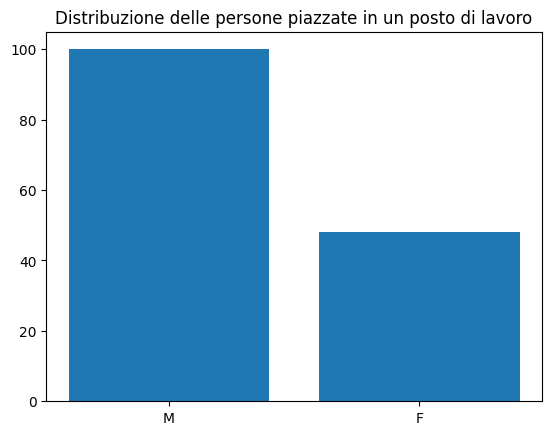

In [12]:
# filtra il DataFrame per selezionare solo le persone piazzate
placed_df = df[df['status'] == 'Placed']

# contare il numero di persone piazzate e non piazzate
placements = placed_df['gender'].value_counts()

# crea il grafico a barre
plt.bar(placements.index, placements.values)

# Aggiungi un titolo al grafico
plt.title('Distribuzione delle persone piazzate in un posto di lavoro')

# Mostra il grafico
plt.show()


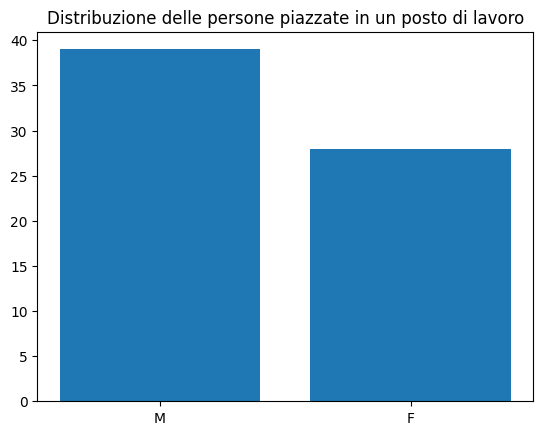

In [14]:
# filtra il DataFrame per selezionare solo le persone piazzate
placed_df = df[df['status'] == 'Not Placed']


# crea il grafico a barre
plt.bar(placements.index, placements.values)

# Aggiungi un titolo al grafico
plt.title('Distribuzione delle persone piazzate in un posto di lavoro')

# Mostra il grafico
plt.show()
